## <font color=#B2D732> <span style="background-color: #4424D6"> Imports

In [12]:
import sys,json
import glob, os
sys.path.append("/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/")
import numpy as np
import nibabel as nib
import seaborn as sns
import nilearn.masking
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## <font color=#B2D732> <span style="background-color: #4424D6"> A/ Initialization

 ### <font color=#4424D6> I. Configuration & parameters </font >

In [2]:
# Load config file ------------------------------------------------------------
with open('../../config/config_seed2voxels.json') as config_file: # the notebook should be in 'xx/notebook/' folder #config_proprio
    config = json.load(config_file) # load config file should be open first and the path inside modified
    #config['list_subjects']=config["list_subjects_younger"]
signal='raw'
seed_indiv=False

## <font color=#B2D732> <span style="background-color: #4424D6"> B/ Load data </font></span>


In [3]:
input_file=[]
for sbj_nb in range(0,len(config["list_subjects"])):
    subject_name=config["list_subjects"][sbj_nb]
    input_file.append(glob.glob(config["first_level"] + "/C1C7_DR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub*" + subject_name + "*"))#ts=np.load(ts_txt + '.npy',allow_pickle=True)

In [21]:
data=nilearn.masking.apply_mask(input_file[1][0], config["main_dir"] + "/hc_project_analyses/mask/brain/MNI_GM_3mm.nii.gz", dtype='f', smoothing_fwhm=None, ensure_finite=True)


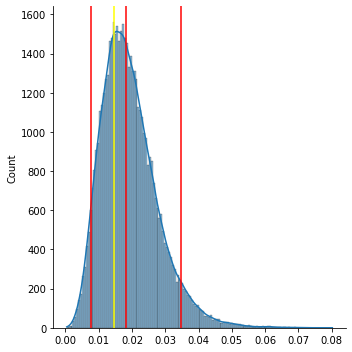

In [22]:
sns.displot(x=data, kde=True)
plt.axvline(x = mode_values,color= "yellow")
plt.axvline(x = np.median(data),color= "red")
plt.axvline(x = np.percentile(data,q=95),color= "red")
plt.axvline(x = np.percentile(data,q=5),color= "red")


In [23]:
bin_size = 0.001
bins = np.arange(min(data), max(data) + bin_size, bin_size)
hist, bin_edges = np.histogram(data, bins=bins)# Create the histogram
max_count_bins = np.where(hist == np.max(hist))[0] # Find the bin(s) with the highest count
mode_values = bin_edges[max_count_bins] # Find the mode value(s) within the bin(s)

# Print the mode value(s)
print("Mode(s):", mode_values)


Mode(s): [0.01437423]


In [18]:
np.sum(hist)

50572

In [139]:
data[0:-1].shape

(50571,)

In [24]:
glob.glob(config["first_level"] + "/C1C7_DR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub*" + subject_name + "*")

['/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/seed_to_voxels/summer_2023/1_first_level//C1C7_DR_gmwm/MNI_GM_3mm_fc_maps/MI/mi_sub-A052.nii.gz']